In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data_set=pd.read_csv("drinking_water_potability.csv")
data_set.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [11]:
ph_mean=data_set["ph"].mean(skipna=True)
data_set["ph"].fillna(ph_mean,inplace=True)
sulfate_mean=data_set["Sulfate"].mean(skipna=True)
data_set["Sulfate"].fillna(sulfate_mean,inplace=True)
trihalomethanes_mean=data_set["Trihalomethanes"].mean(skipna=True)
data_set["Trihalomethanes"].fillna(trihalomethanes_mean,inplace=True)
data_set.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [12]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


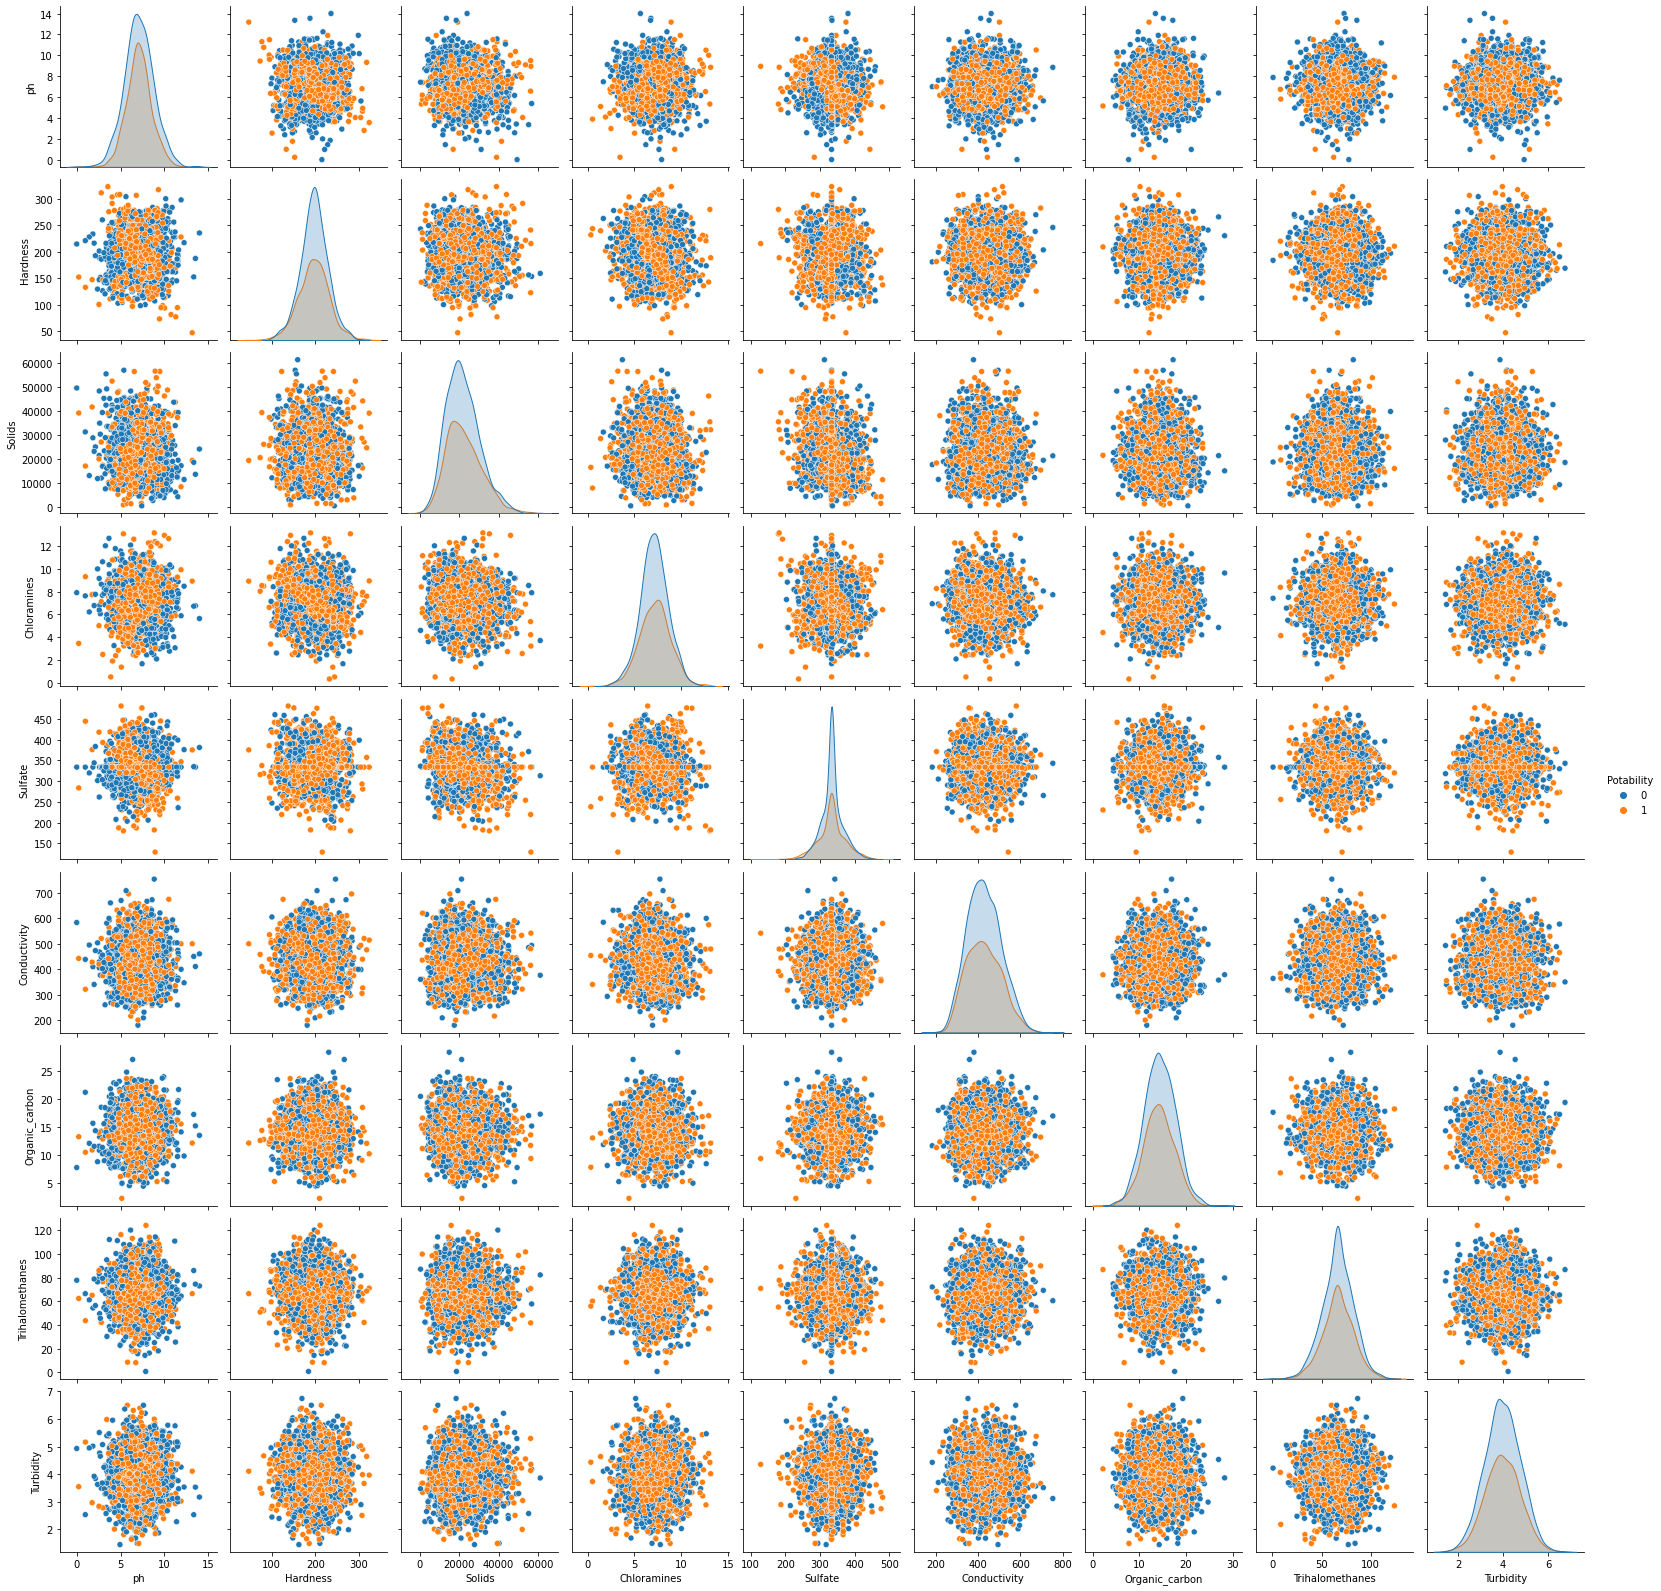

In [5]:
sns.pairplot(data_set,hue="Potability")
plt.show()

In [13]:
x=data_set.iloc[:,:-1].values
y=data_set.iloc[:,-1].values

In [14]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x=sc_x.fit_transform(x)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(x_train,y_train)

LogisticRegression()

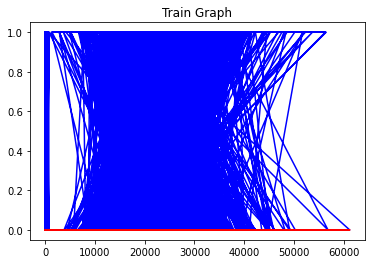

In [17]:
plt.plot(sc_x.inverse_transform(x_train),y_train,"b")
plt.plot(sc_x.inverse_transform(x_train),log_classifier.predict(x_train),"r")
plt.title("Train Graph")
plt.show()

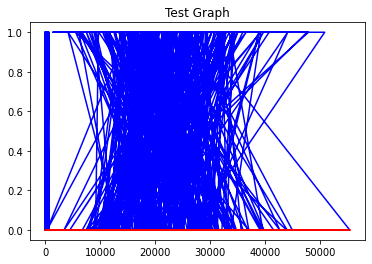

In [18]:
plt.plot(sc_x.inverse_transform(x_test),y_test,"b")
plt.plot(sc_x.inverse_transform(x_test),log_classifier.predict(x_test),"r")
plt.title("Test Graph")
plt.show()

In [19]:
print("Train Score: ",log_classifier.score(x_train,y_train))
print("Test Score: ",log_classifier.score(x_test,y_test))

Train Score:  0.6053435114503817
Test Score:  0.6280487804878049


## SVC

In [20]:
from sklearn.svm import SVC
svc_classifier=SVC(kernel="rbf",random_state=42)
svc_classifier.fit(x_train,y_train)

SVC(random_state=42)

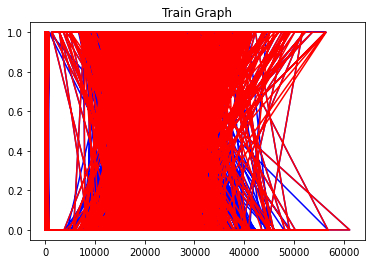

In [21]:
plt.plot(sc_x.inverse_transform(x_train),y_train,"b")
plt.plot(sc_x.inverse_transform(x_train),svc_classifier.predict(x_train),"r")
plt.title("Train Graph")
plt.show()

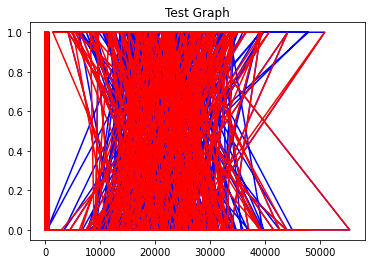

In [22]:
plt.plot(sc_x.inverse_transform(x_test),y_test,"b")
plt.plot(sc_x.inverse_transform(x_test),svc_classifier.predict(x_test),"r")
plt.title("Test Graph")
plt.show()

In [23]:
print("Train Score: ",svc_classifier.score(x_train,y_train))
print("Test Score: ",svc_classifier.score(x_test,y_test))

Train Score:  0.7377862595419847
Test Score:  0.6951219512195121


In [24]:
y_train_pred=svc_classifier.predict(x_train)
y_test_pred=svc_classifier.predict(x_test)

from sklearn.metrics import confusion_matrix
print("Train Confusion Matrix:\n",confusion_matrix(y_train,y_train_pred))
print("Test Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))

Train Confusion Matrix:
 [[1518   68]
 [ 619  415]]
Test Confusion Matrix:
 [[377  35]
 [165  79]]


## KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier(metric="minkowski",p=2)
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier()

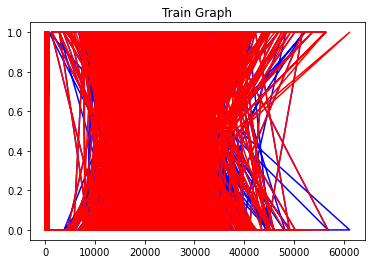

In [26]:
plt.plot(sc_x.inverse_transform(x_train),y_train,"b")
plt.plot(sc_x.inverse_transform(x_train),knn_classifier.predict(x_train),"r")
plt.title("Train Graph")
plt.show()

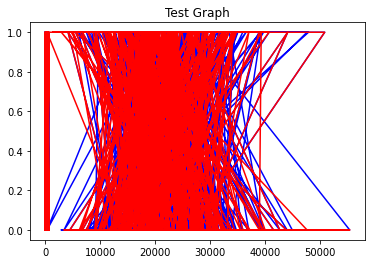

In [27]:
plt.plot(sc_x.inverse_transform(x_test),y_test,"b")
plt.plot(sc_x.inverse_transform(x_test),knn_classifier.predict(x_test),"r")
plt.title("Test Graph")
plt.show()

In [28]:
print("Train Score: ",knn_classifier.score(x_train,y_train))
print("Test Score: ",knn_classifier.score(x_test,y_test))

Train Score:  0.7614503816793893
Test Score:  0.6265243902439024


In [29]:
y_train_pred=knn_classifier.predict(x_train)
y_test_pred=knn_classifier.predict(x_test)

from sklearn.metrics import confusion_matrix
print("Train Confusion Matrix:\n",confusion_matrix(y_train,y_train_pred))
print("Test Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))

Train Confusion Matrix:
 [[1385  201]
 [ 424  610]]
Test Confusion Matrix:
 [[311 101]
 [144 100]]


## Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB
bayes_classifier=GaussianNB()
bayes_classifier.fit(x_train,y_train)

GaussianNB()

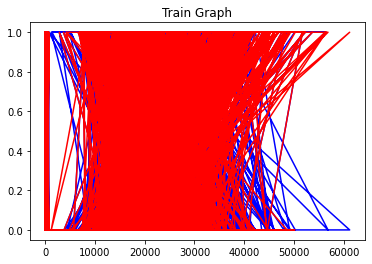

In [32]:
plt.plot(sc_x.inverse_transform(x_train),y_train,"b")
plt.plot(sc_x.inverse_transform(x_train),bayes_classifier.predict(x_train),"r")
plt.title("Train Graph")
plt.show()

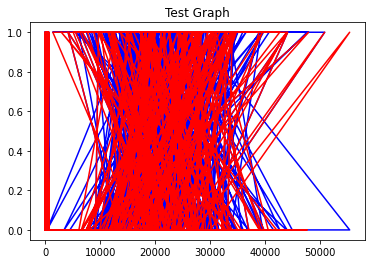

In [33]:
plt.plot(sc_x.inverse_transform(x_test),y_test,"b")
plt.plot(sc_x.inverse_transform(x_test),bayes_classifier.predict(x_test),"r")
plt.title("Test Graph")
plt.show()

In [34]:
print("Train Score: ",bayes_classifier.score(x_train,y_train))
print("Test Score: ",bayes_classifier.score(x_test,y_test))

Train Score:  0.6282442748091603
Test Score:  0.6310975609756098


In [35]:
y_train_pred=bayes_classifier.predict(x_train)
y_test_pred=bayes_classifier.predict(x_test)

from sklearn.metrics import confusion_matrix
print("Train Confusion Matrix:\n",confusion_matrix(y_train,y_train_pred))
print("Test Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))

Train Confusion Matrix:
 [[1394  192]
 [ 782  252]]
Test Confusion Matrix:
 [[361  51]
 [191  53]]


## Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier=DecisionTreeClassifier(criterion="entropy",random_state=42)
tree_classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

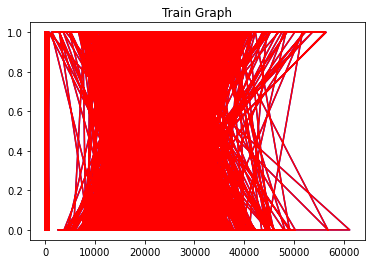

In [37]:
plt.plot(sc_x.inverse_transform(x_train),y_train,"b")
plt.plot(sc_x.inverse_transform(x_train),tree_classifier.predict(x_train),"r")
plt.title("Train Graph")
plt.show()

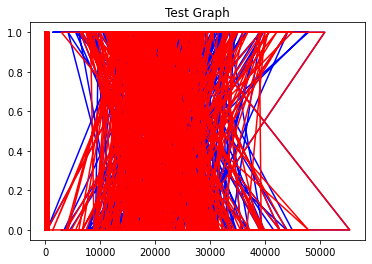

In [38]:
plt.plot(sc_x.inverse_transform(x_test),y_test,"b")
plt.plot(sc_x.inverse_transform(x_test),tree_classifier.predict(x_test),"r")
plt.title("Test Graph")
plt.show()

In [39]:
print("Train Score: ",tree_classifier.score(x_train,y_train))
print("Test Score: ",tree_classifier.score(x_test,y_test))

Train Score:  1.0
Test Score:  0.5670731707317073


## Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
forest_classifier=RandomForestClassifier(criterion="entropy",random_state=42)
forest_classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

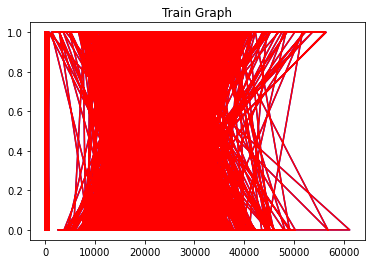

In [41]:
plt.plot(sc_x.inverse_transform(x_train),y_train,"b")
plt.plot(sc_x.inverse_transform(x_train),forest_classifier.predict(x_train),"r")
plt.title("Train Graph")
plt.show()

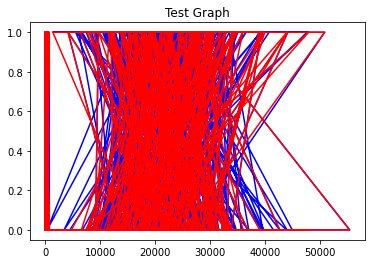

In [42]:
plt.plot(sc_x.inverse_transform(x_test),y_test,"b")
plt.plot(sc_x.inverse_transform(x_test),forest_classifier.predict(x_test),"r")
plt.title("Test Graph")
plt.show()

In [43]:
print("Train Score: ",forest_classifier.score(x_train,y_train))
print("Test Score: ",forest_classifier.score(x_test,y_test))

Train Score:  1.0
Test Score:  0.6798780487804879


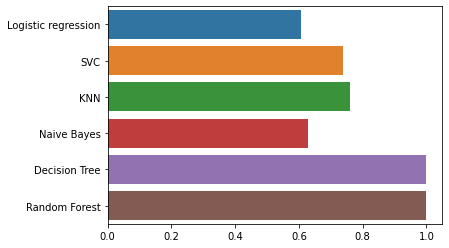

In [45]:
model=["Logistic regression","SVC","KNN","Naive Bayes","Decision Tree","Random Forest"]
train_scores=[log_classifier.score(x_train,y_train),svc_classifier.score(x_train,y_train),knn_classifier.score(x_train,y_train),bayes_classifier.score(x_train,y_train),tree_classifier.score(x_train,y_train),forest_classifier.score(x_train,y_train)]

sns.barplot(x=train_scores,y=model)
plt.show()

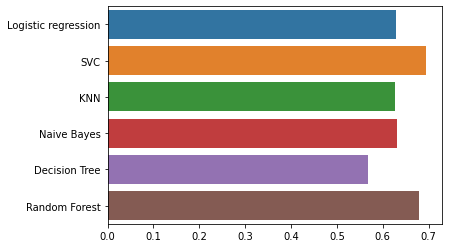

In [46]:
test_scores=[log_classifier.score(x_test,y_test),svc_classifier.score(x_test,y_test),knn_classifier.score(x_test,y_test),bayes_classifier.score(x_test,y_test),tree_classifier.score(x_test,y_test),forest_classifier.score(x_test,y_test)]

sns.barplot(x=test_scores,y=model)
plt.show()